In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import our data into pandas from CSV
filepath1 = "Datasets/Olympic_Athlete_Event_Details.csv"
filepath2 = "Datasets/Olympic_Country_Profiles.csv"
filepath3 = "Datasets/Olympic_Event_Results.csv"
filepath4 = "Datasets/Olympic_Games_Summary.csv"
filepath5 = "Datasets/Olympic_Medal_Tally_History.csv"
filepath6 = "Datasets/world-population.csv"
df_Athlete_Event_Details = pd.read_csv(filepath1)
df_Country_Profiles = pd.read_csv(filepath2)
df_Event_Results = pd.read_csv(filepath3)
df_Games_Summary = pd.read_csv(filepath4)
df_Medal_Tally_History = pd.read_csv(filepath5)
df_world_population = pd.read_csv(filepath6)


df_Athlete_Event_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2   country_noc  316834 non-null  object
 3   sport        316834 non-null  object
 4   event        316834 non-null  object
 5   result_id    316834 non-null  int64 
 6   athlete      316834 non-null  object
 7   athlete_id   316834 non-null  int64 
 8   pos          316834 non-null  object
 9   medal        44687 non-null   object
 10  isTeamSport  316834 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.5+ MB


In [3]:
df_Event_Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7394 non-null   int64 
 1   event_title          7394 non-null   object
 2   edition              7394 non-null   object
 3   edition_id           7394 non-null   int64 
 4   sport                7394 non-null   object
 5   sport_url            7394 non-null   object
 6   result_date          7394 non-null   object
 7   result_location      7393 non-null   object
 8   result_participants  7394 non-null   object
 9   result_format        7394 non-null   object
 10  result_detail        7394 non-null   object
 11  result_description   7394 non-null   object
dtypes: int64(2), object(10)
memory usage: 693.3+ KB


In [4]:
df_Medal_Tally_History.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1807 non-null   object
 1   edition_id   1807 non-null   int64 
 2   year         1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB


In [5]:
df_world_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        4196 non-null   object 
 1   Year                           4196 non-null   int64  
 2   Population                     4196 non-null   int64  
 3   Yearly %   Change              4196 non-null   object 
 4   Yearly  Change                 4196 non-null   int64  
 5   Migrants (net)                 3618 non-null   float64
 6   Median Age                     3618 non-null   float64
 7   Fertility Rate                 3618 non-null   float64
 8   Density (P/Km²)                4196 non-null   int64  
 9   Urban  Pop %                   4196 non-null   object 
 10  Urban Population               4196 non-null   object 
 11  Country's Share of  World Pop  4196 non-null   object 
 12  World Population               4196 non-null   i

In [6]:
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Soviet Union': 'Russian Federation'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Russian Olympic Committee': 'Russian Federation'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'ROC': 'Russian Federation'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Unified Team': 'Russian Federation'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'East Germany': 'Germany'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'West Germany': 'Germany'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Saar': 'Germany'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Bohemia': 'Czechia'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Australasia': 'Australia'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Rhodesia': 'Zimbabwe'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'South Yemen': 'Yemen'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'North Yemen': 'Yemen'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'Serbia and Montenegro': 'Serbia'})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({"Democratic People's Republic of Korea": "Republic of Korea"})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({"Korea Town": "Republic of Korea"})
df_Country_Profiles['country'] = df_Country_Profiles['country'].replace({'South Vietnam': 'Vietnam'})

In [7]:
df_Country_Profiles.to_csv("Datasets/Country_Profiles_Clean.csv", index = False)

In [8]:
#Clean up the athlete event details tab to collapse all of the teams sports into one athlete
# Filter out individual rows for team sports
non_team_sports = df_Athlete_Event_Details[~df_Athlete_Event_Details['isTeamSport']]
team_sports_grouped = (
    df_Athlete_Event_Details[df_Athlete_Event_Details['isTeamSport']]
    .groupby(['edition', 'country_noc', 'sport', 'event'], as_index=False)
    .agg({
        'athlete': lambda x: ', '.join(x),  # Combine athlete names into one string
        'pos': 'first',                     # Keep position (or change aggregation logic as needed)
        'medal': 'first',                   # Assume medals are the same for team members
        'isTeamSport': 'first'              # Keep the isTeamSport value
    })
)

# Combine the grouped team sports with non-team sports
athlete_results_clean = pd.concat([team_sports_grouped, non_team_sports], ignore_index=True).reset_index(drop = True)

# Display the result
athlete_results_clean.head()

,edition,country_noc,sport,event,athlete,pos,medal,isTeamSport,edition_id,result_id,athlete_id
0,1896 Summer Olympics,AUS,Tennis,"Doubles, Men","Teddy Flack, George Stuart Robertson",3,Bronze,True,NaN,NaN,NaN
1,1896 Summer Olympics,FRA,Tennis,"Doubles, Men","J. Defert, André Vacherot",DNS,None,True,NaN,NaN,NaN
2,1896 Summer Olympics,GBR,Tennis,"Doubles, Men","John Pius Boland, Fritz Traun, Teddy Flack, Ge...",1,Gold,True,NaN,NaN,NaN
3,1896 Summer Olympics,GER,Artistic Gymnastics,"Horizontal Bar, Teams, Men","Carl Schuhmann, Conrad Böcker, Alfred Flatow, ...",1,Gold,True,NaN,NaN,NaN
4,1896 Summer Olympics,GER,Artistic Gymnastics,"Parallel Bars, Teams, Men","Conrad Böcker, Alfred Flatow, Gustav Flatow, G...",1,Gold,True,NaN,NaN,NaN


In [9]:
#USE ATHLETE EVENT DETAIL TO COMBINE ATHLETE WITH COUNTRY TO FIND OUT HOW MANY COMPETED FOR THAT COUNTRY

In [10]:
athlete_results_clean.head()

,edition,country_noc,sport,event,athlete,pos,medal,isTeamSport,edition_id,result_id,athlete_id
0,1896 Summer Olympics,AUS,Tennis,"Doubles, Men","Teddy Flack, George Stuart Robertson",3,Bronze,True,NaN,NaN,NaN
1,1896 Summer Olympics,FRA,Tennis,"Doubles, Men","J. Defert, André Vacherot",DNS,None,True,NaN,NaN,NaN
2,1896 Summer Olympics,GBR,Tennis,"Doubles, Men","John Pius Boland, Fritz Traun, Teddy Flack, Ge...",1,Gold,True,NaN,NaN,NaN
3,1896 Summer Olympics,GER,Artistic Gymnastics,"Horizontal Bar, Teams, Men","Carl Schuhmann, Conrad Böcker, Alfred Flatow, ...",1,Gold,True,NaN,NaN,NaN
4,1896 Summer Olympics,GER,Artistic Gymnastics,"Parallel Bars, Teams, Men","Conrad Böcker, Alfred Flatow, Gustav Flatow, G...",1,Gold,True,NaN,NaN,NaN


In [11]:
athlete_results_clean["AthletesPerCountry"] = athlete_results_clean.groupby("country_noc")["athlete"].transform("count")
#print(athlete_results_clean)

In [12]:
# Group by 'Country' and sum the 'AthletesPerCountry'
athletes_per_country = athlete_results_clean.groupby("country_noc")["AthletesPerCountry"].sum().reset_index()

# Rename the column for clarity
athletes_per_country.rename(columns={"AthletesPerCountry": "Total_Athletes"}, inplace=True)

# Display the result
#print(athletes_per_country)

In [13]:
athletes_per_country = athletes_per_country.sort_values(by="Total_Athletes", ascending=False)
#print(athletes_per_country)

In [14]:
athletes_per_country = athletes_per_country.sort_values(by="Total_Athletes", ascending=True)
#print(athletes_per_country)

In [15]:
filtered_countries = athletes_per_country[athletes_per_country["Total_Athletes"] >= 200]

Top 20 Countries by Winning Percentage (minimum 200 athletes):
    country_noc  Total_Athletes  total_medals  winning_percentage
13          WIF             289           2.0                0.69
22          KOS             841           3.0                0.36
82          ANZ            7569          12.0                0.16
42          BDI            2209           2.0                0.09
53          GRN            3600           3.0                0.08
80          IOA            7396           5.0                0.07
85          NAM            7921           5.0                0.06
74          TJK            6400           4.0                0.06
51          NIG            3249           2.0                0.06
38          DJI            1936           1.0                0.05
44          MNE            2601           1.0                0.04
154         ETH          153664          58.0                0.04
47          TGA            2809           1.0                0.04
46          G

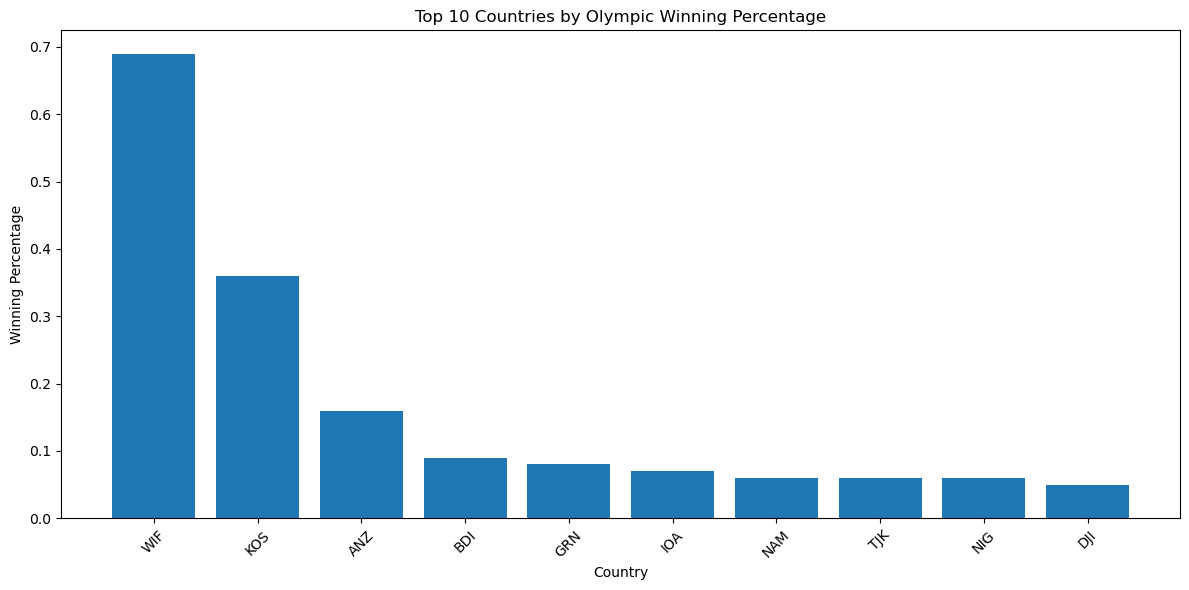

In [16]:
# First, let's calculate medals per country
medals_by_country = athlete_results_clean[athlete_results_clean['medal'].notna()].groupby('country_noc')['medal'].count().reset_index()
medals_by_country.columns = ['country_noc', 'total_medals']
 
# Merge with our athletes per country data
country_performance = pd.merge(athletes_per_country, medals_by_country, on='country_noc', how='left')
 
# Fill NaN values with 0 for countries with no medals
country_performance['total_medals'] = country_performance['total_medals'].fillna(0)
 
# Calculate winning percentage
country_performance['winning_percentage'] = (country_performance['total_medals'] / country_performance['Total_Athletes'] * 100).round(2)
 
# Filter for countries with at least 100 athletes
filtered_performance = country_performance[country_performance['Total_Athletes'] >= 200].sort_values('winning_percentage', ascending=False)
 
# Display top 20 countries by winning percentage
print("Top 20 Countries by Winning Percentage (minimum 200 athletes):")
print(filtered_performance.head(20))
 
# Optional: Create a visualization
plt.figure(figsize=(12, 6))
plt.bar(filtered_performance.head(10)['country_noc'], filtered_performance.head(10)['winning_percentage'])
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Olympic Winning Percentage')
plt.xlabel('Country')
plt.ylabel('Winning Percentage')
plt.tight_layout()
plt.show()

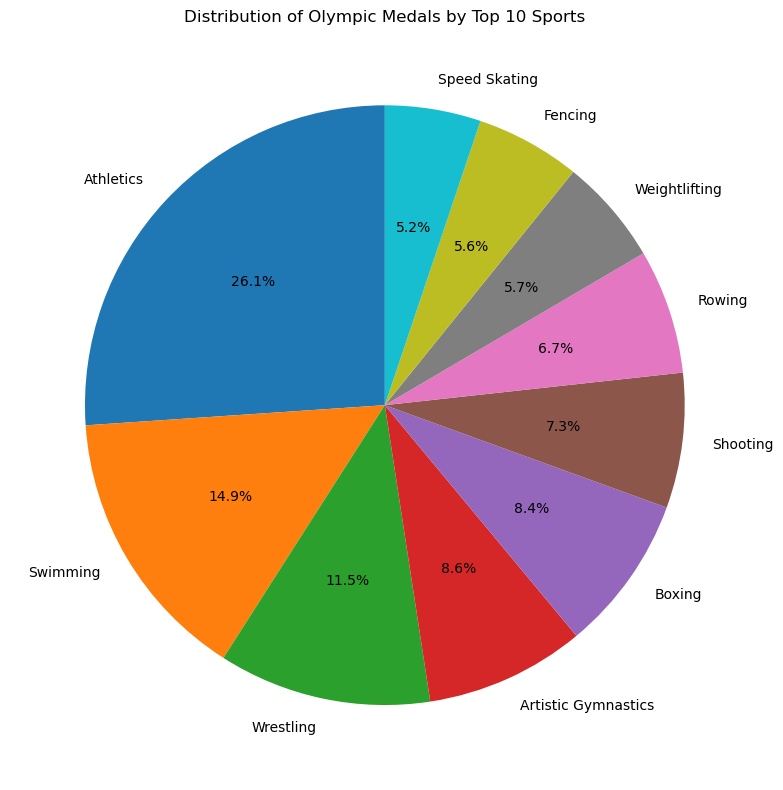

In [17]:
# Aggregate medals by sport
sport_medals = athlete_results_clean[athlete_results_clean['medal'].notna()].groupby('sport')['medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.pie(sport_medals.values, labels=sport_medals.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Olympic Medals by Top 10 Sports')
plt.tight_layout()
plt.show()

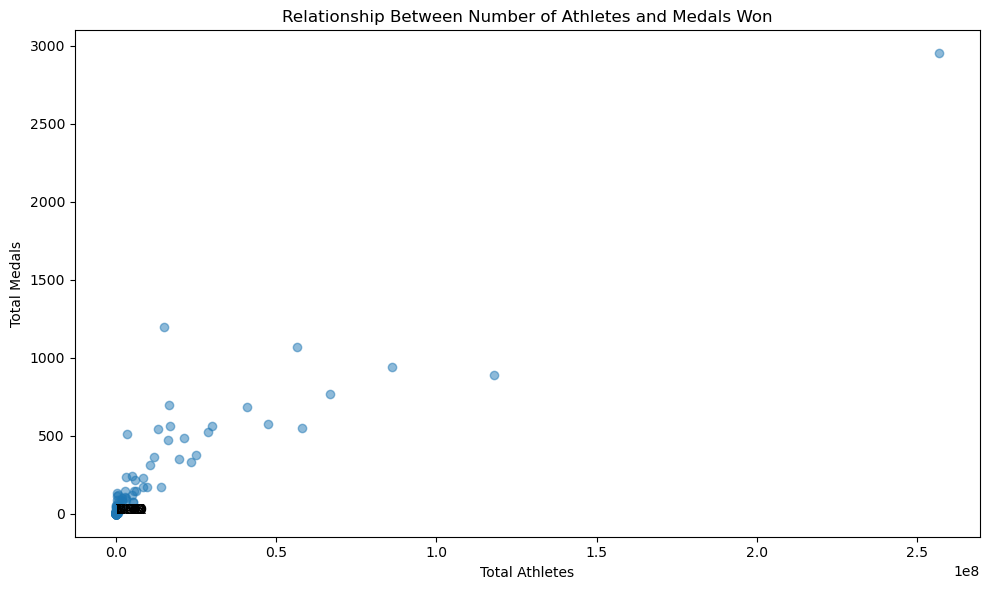

In [18]:
# Create scatter plot of total athletes vs medals
plt.figure(figsize=(10, 6))
plt.scatter(country_performance['Total_Athletes'], country_performance['total_medals'], alpha=0.5)
plt.xlabel('Total Athletes')
plt.ylabel('Total Medals')
plt.title('Relationship Between Number of Athletes and Medals Won')

# Add country labels for top 10 countries
for i in range(10):
    country = country_performance.iloc[i]
    plt.annotate(country['country_noc'], 
                (country['Total_Athletes'], country['total_medals']))

plt.tight_layout()
plt.show()

In [19]:
medal_types_df = df_Medal_Tally_History[['gold', 'silver', 'bronze']]

<Figure size 1000x600 with 0 Axes>

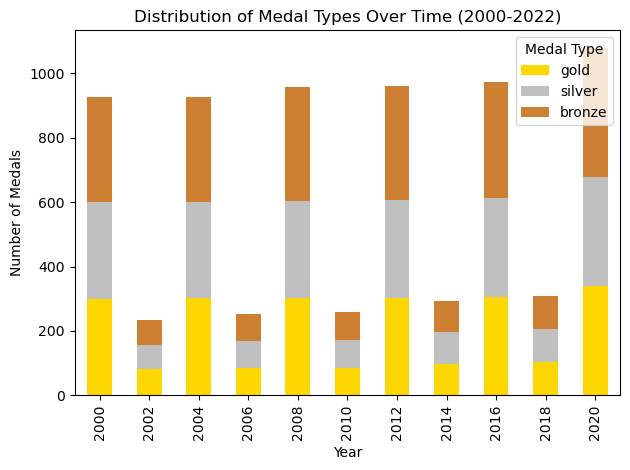

In [20]:
# Filter the df_Medal_Tally_History to include only specific years (2000 to 2020)
filtered_df = df_Medal_Tally_History[df_Medal_Tally_History['year'].between(2000, 2020)]

# Group by 'year' and sum up the medal counts (assuming you have 'gold', 'silver', and 'bronze' columns)
medal_types = filtered_df.groupby('year')[['gold', 'silver', 'bronze']].sum()

# Create stacked bar chart with custom colors
custom_colors = ['gold', 'silver', '#cd7f32']  # Hex code for bronze

plt.figure(figsize=(10, 6))
medal_types.plot(kind='bar', stacked=True, color=custom_colors)
plt.title('Distribution of Medal Types Over Time (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()

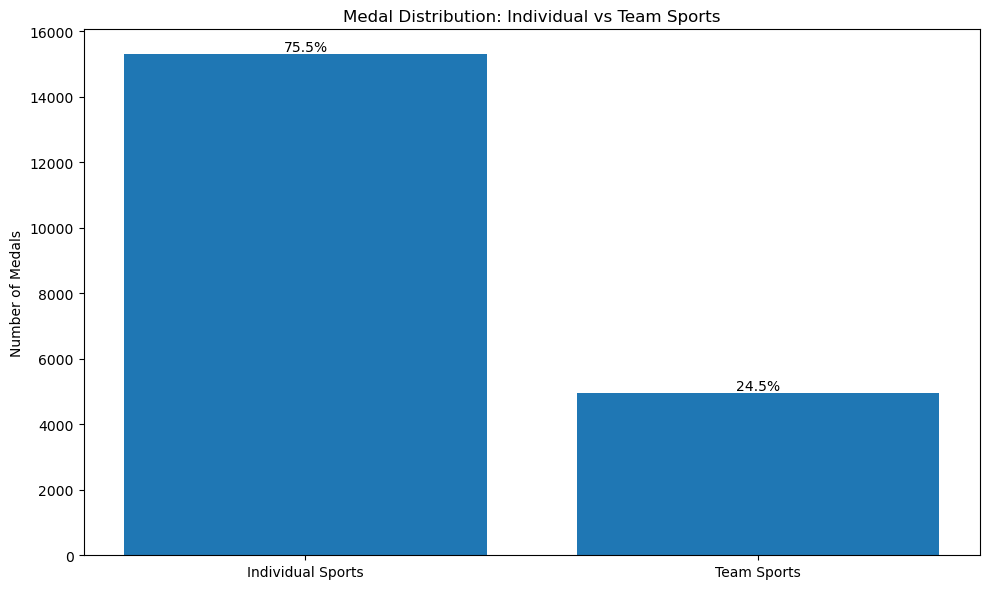

In [21]:
# Calculate success rate in team vs individual sports
team_vs_individual = athlete_results_clean[athlete_results_clean['medal'].notna()].groupby('isTeamSport')['medal'].count()

plt.figure(figsize=(10, 6))
bars = plt.bar(['Individual Sports', 'Team Sports'], team_vs_individual.values)
plt.title('Medal Distribution: Individual vs Team Sports')
plt.ylabel('Number of Medals')

# Add percentage labels on bars
total = team_vs_individual.sum()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{(height/total)*100:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

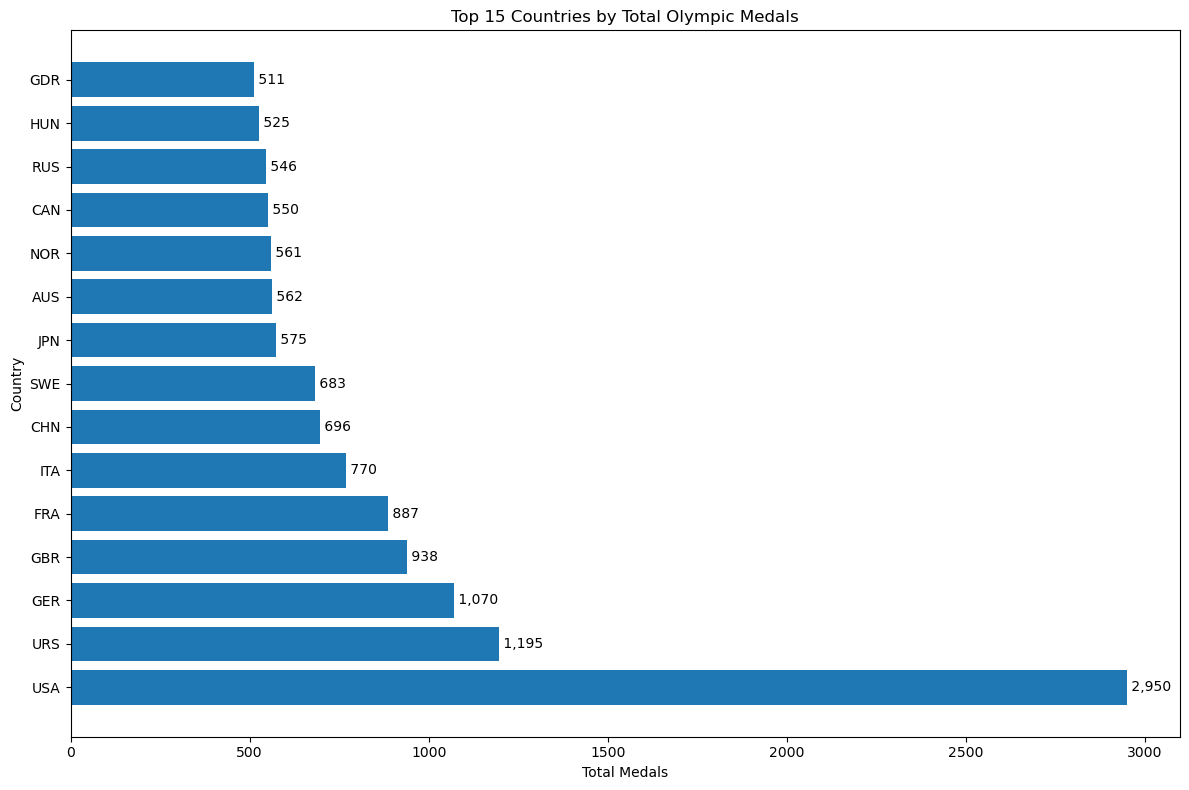

In [22]:
# Create horizontal bar chart of top 15 countries by total medals
top_15_countries = country_performance.nlargest(15, 'total_medals')

plt.figure(figsize=(12, 8))
plt.barh(top_15_countries['country_noc'], top_15_countries['total_medals'])
plt.title('Top 15 Countries by Total Olympic Medals')
plt.xlabel('Total Medals')
plt.ylabel('Country')

# Add value labels
for i, v in enumerate(top_15_countries['total_medals']):
    plt.text(v, i, f' {int(v):,}', va='center')

plt.tight_layout()
plt.show()

In [23]:
df_world_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        4196 non-null   object 
 1   Year                           4196 non-null   int64  
 2   Population                     4196 non-null   int64  
 3   Yearly %   Change              4196 non-null   object 
 4   Yearly  Change                 4196 non-null   int64  
 5   Migrants (net)                 3618 non-null   float64
 6   Median Age                     3618 non-null   float64
 7   Fertility Rate                 3618 non-null   float64
 8   Density (P/Km²)                4196 non-null   int64  
 9   Urban  Pop %                   4196 non-null   object 
 10  Urban Population               4196 non-null   object 
 11  Country's Share of  World Pop  4196 non-null   object 
 12  World Population               4196 non-null   i

In [24]:
df_world_population.head()

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39


In [25]:
# Select only the specific columns
specific_columns = df_world_population[['country', 'Year', 'Urban Population', 'Rank']]

# Display the result
#print(specific_columns)

In [26]:
# Specify the columns to drop
columns_to_drop = [ 'Yearly %   Change', 'Yearly  Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban  Pop %', "Country's Share of  World Pop", 'World Population', 'Urban Population']

# Drop the columns
df_world_population.drop(columns=columns_to_drop, inplace=True)

# Display the modified DataFrame
print(df_world_population.shape)
df_world_population.head()

(4196, 4)


,country,Year,Population,Rank
0,Afghanistan,2020,38928346,37
1,Afghanistan,2019,38041754,37
2,Afghanistan,2018,37171921,38
3,Afghanistan,2017,36296113,39
4,Afghanistan,2016,35383032,39


In [27]:
#df_world_population_ = df_world_population_[(df_world_population_['Year'] >= 1994) & (df_world_population_['Year'] <= 2022)]
#print(filtered_df)

In [28]:
# Sort the DataFrame by the 'Year' column in ascending order
sorted_table = df_world_population.sort_values(by='Rank', ascending=True)

# Display the sorted DataFrame as a table
#print(sorted_table)

In [29]:
# Merge df_Medal_Tally_History with df_world_population_ on 'country'
df_medal_tally_pop = pd.merge(df_Medal_Tally_History, df_world_population, on='country', how='inner')

# Filter the merged DataFrame to only include years between 1994 and 2022
filtered_df = df_medal_tally_pop[(df_medal_tally_pop['year'] >= 1994) & (df_medal_tally_pop['year'] <= 2022)]

# Select only the relevant columns: 'country', 'population', 'year', 'gold', 'silver', 'bronze'
df_medal_pop = filtered_df[['country', 'Population', 'year', 'gold', 'silver', 'bronze']]

# Display the filtered DataFrame
print(df_medal_pop)

             country  Population  year  gold  silver  bronze
11176  United States   331002651  1996    44      32      25
11177  United States   329064917  1996    44      32      25
11178  United States   327096265  1996    44      32      25
11179  United States   325084756  1996    44      32      25
11180  United States   323015995  1996    44      32      25
...              ...         ...   ...   ...     ...     ...
26266         Poland    33970724  2022     0       0       1
26267         Poland    32639258  2022     0       0       1
26268         Poland    31360907  2022     0       0       1
26269         Poland    29614201  2022     0       0       1
26270         Poland    27269749  2022     0       0       1

[11805 rows x 6 columns]


In [30]:
# Filter the merged DataFrame to only include years between 1994 and 2022
filtered_df = df_medal_tally_pop[(df_medal_tally_pop['year'] >= 1994) & (df_medal_tally_pop['year'] <= 2022)]

# Sort the DataFrame by 'population' in ascending order and select the first 10 rows
smallest_countries_df = filtered_df.sort_values(by='Population', ascending=True).head(10)

# Select relevant columns to display
result_df = smallest_countries_df[['country', 'Population', 'year', 'gold', 'silver', 'bronze']]

# Display the top 10 smallest countries by population
print(result_df)

             country  Population  year  gold  silver  bronze
19669     San Marino       13789  2020     0       1       2
25838  Liechtenstein       14830  2018     0       0       1
19668     San Marino       15432  2020     0       1       2
25837  Liechtenstein       16493  2018     0       0       1
19667     San Marino       17513  2020     0       1       2
25836  Liechtenstein       18649  2018     0       0       1
19666     San Marino       19221  2020     0       1       2
19665     San Marino       19831  2020     0       1       2
25835  Liechtenstein       21266  2018     0       0       1
19664     San Marino       21459  2020     0       1       2


In [31]:
# Filter the merged DataFrame to only include years between 1994 and 2022
year_mask_s = (df_medal_tally_pop['year'] >= 1994) & (df_medal_tally_pop['year'] <= 2022)
filtered_df = df_medal_tally_pop.loc[year_mask_s, ['country', 'Population', 'gold', 'silver', 'bronze', 'total']]
print(filtered_df.shape)
filtered_df.head()
# # Sort the DataFrame by 'population' in descending order and select the first 10 rows
# largest_countries_df = filtered_df.sort_values(by='Population', ascending=False).head(20)

# # Select relevant columns to display
# result_df = largest_countries_df[['country', 'Population', 'year', 'gold', 'silver', 'bronze']]

# # Display the top 10 largest countries by population
# print(result_df)

(11805, 6)


,country,Population,gold,silver,bronze,total
11176,United States,331002651,44,32,25,101
11177,United States,329064917,44,32,25,101
11178,United States,327096265,44,32,25,101
11179,United States,325084756,44,32,25,101
11180,United States,323015995,44,32,25,101


In [32]:
agg_funcs = {'Population': ['mean', 'sum'], 'gold': 'sum', 'silver': 'sum', 'bronze': 'sum', 'total': 'sum'}
recent_medal_sum_df = filtered_df.groupby("country").agg(agg_funcs)
print(recent_medal_sum_df.shape)
recent_medal_sum_df

(109, 6)


Population              gold silver bronze total
                     mean         sum   sum    sum    sum   sum
country                                                        
Afghanistan  2.237552e+07   805518552     0      0     36    36
Algeria      2.842200e+07  2557980350    72     72     90   234
Argentina    3.434749e+07  4327784293   144    126    270   540
Armenia      2.822521e+06   304832232    36    144    144   324
Australia    1.845549e+07  4982981355  1710   1890   2232  5832
...                   ...         ...   ...    ...    ...   ...
Uzbekistan   2.233220e+07  3215836976   198    108    360   666
Venezuela    2.097055e+07  1887349420    36     90     72   198
Vietnam      7.060293e+07  5083411288    18     54     18    90
Zambia       1.038268e+07   186888278     0     18      0    18
Zimbabwe     1.021435e+07   367716436    36     72     18   126

[109 rows x 6 columns]

In [33]:
(recent_medal_sum_df['Population']['sum'] / recent_medal_sum_df['Population']['mean']).sort_values()

country
Bermuda           17.0
Liechtenstein     17.0
San Marino        17.0
Mauritius         18.0
Montenegro        18.0
                 ...  
Belarus          270.0
France           270.0
Finland          270.0
Norway           270.0
Germany          270.0
Length: 109, dtype: float64

In [34]:
recent_medal_sum_df["medals_per_millions"]= 1e6*(recent_medal_sum_df['total']['sum'] / recent_medal_sum_df['Population']['mean']).sort_values(ascending=False)

In [35]:
print(recent_medal_sum_df.columns)

MultiIndex([(         'Population', 'mean'),
            (         'Population',  'sum'),
            (               'gold',  'sum'),
            (             'silver',  'sum'),
            (             'bronze',  'sum'),
            (              'total',  'sum'),
            ('medals_per_millions',     '')],
           )


In [36]:
print(recent_medal_sum_df.columns)
print(recent_medal_sum_df.index)

MultiIndex([(         'Population', 'mean'),
            (         'Population',  'sum'),
            (               'gold',  'sum'),
            (             'silver',  'sum'),
            (             'bronze',  'sum'),
            (              'total',  'sum'),
            ('medals_per_millions',     '')],
           )
Index(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=109)


In [37]:
# Reset the index if there is a MultiIndex
recent_medal_sum_df_reset = recent_medal_sum_df.reset_index()

# Check the columns again after resetting the index
print(recent_medal_sum_df_reset.columns)

MultiIndex([(            'country',     ''),
            (         'Population', 'mean'),
            (         'Population',  'sum'),
            (               'gold',  'sum'),
            (             'silver',  'sum'),
            (             'bronze',  'sum'),
            (              'total',  'sum'),
            ('medals_per_millions',     '')],
           )


In [38]:
# After resetting the index, proceed with sorting and displaying results
sorted_medals = recent_medal_sum_df_reset.sort_values(by='medals_per_millions', ascending=False)

# Display the results for the top countries and their medals per million
print(sorted_medals[['country', 'medals_per_millions']])

           country medals_per_millions
                                      
82      San Marino         1987.606688
72          Norway         1067.025265
57   Liechtenstein          577.699596
40         Grenada          534.454147
49         Jamaica          470.746561
..             ...                 ...
106        Vietnam            1.274735
89       Sri Lanka            1.050608
38           Ghana            0.961318
90           Sudan            0.701227
44           India            0.391727

[109 rows x 2 columns]


In [39]:
display(sorted_medals[['country', 'medals_per_millions']])

,country,medals_per_millions
,,
82,San Marino,1987.606688
72,Norway,1067.025265
57,Liechtenstein,577.699596
40,Grenada,534.454147
49,Jamaica,470.746561
...,...,...
106,Vietnam,1.274735
89,Sri Lanka,1.050608
38,Ghana,0.961318


In [40]:
print(recent_medal_sum_df_reset[['total', 'Population']].isnull().sum())

total       sum     0
Population  mean    0
            sum     0
dtype: int64


In [41]:
print(recent_medal_sum_df_reset.columns)

MultiIndex([(            'country',     ''),
            (         'Population', 'mean'),
            (         'Population',  'sum'),
            (               'gold',  'sum'),
            (             'silver',  'sum'),
            (             'bronze',  'sum'),
            (              'total',  'sum'),
            ('medals_per_millions',     '')],
           )


In [42]:
recent_medal_sum_df_reset['total_medals'] = recent_medal_sum_df_reset['gold'] + recent_medal_sum_df_reset['silver'] + recent_medal_sum_df_reset['bronze']


In [43]:
# Assuming 'gold', 'silver', and 'bronze' columns exist in the DataFrame
recent_medal_sum_df_reset['total_medals'] = recent_medal_sum_df_reset[['gold', 'silver', 'bronze']].sum(axis=1)
print(recent_medal_sum_df_reset)

         country    Population              gold silver bronze total  \
                          mean         sum   sum    sum    sum   sum   
0    Afghanistan  2.237552e+07   805518552     0      0     36    36   
1        Algeria  2.842200e+07  2557980350    72     72     90   234   
2      Argentina  3.434749e+07  4327784293   144    126    270   540   
3        Armenia  2.822521e+06   304832232    36    144    144   324   
4      Australia  1.845549e+07  4982981355  1710   1890   2232  5832   
..           ...           ...         ...   ...    ...    ...   ...   
104   Uzbekistan  2.233220e+07  3215836976   198    108    360   666   
105    Venezuela  2.097055e+07  1887349420    36     90     72   198   
106      Vietnam  7.060293e+07  5083411288    18     54     18    90   
107       Zambia  1.038268e+07   186888278     0     18      0    18   
108     Zimbabwe  1.021435e+07   367716436    36     72     18   126   

    medals_per_millions total_medals  
                        

In [44]:
#recent_medal_sum_df_reset.style.set_table_styles([
    #{'selector': 'th', 'props': [('background-color', 'lightgray')]},
   # {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]}
#])

In [45]:
#x-axis average 

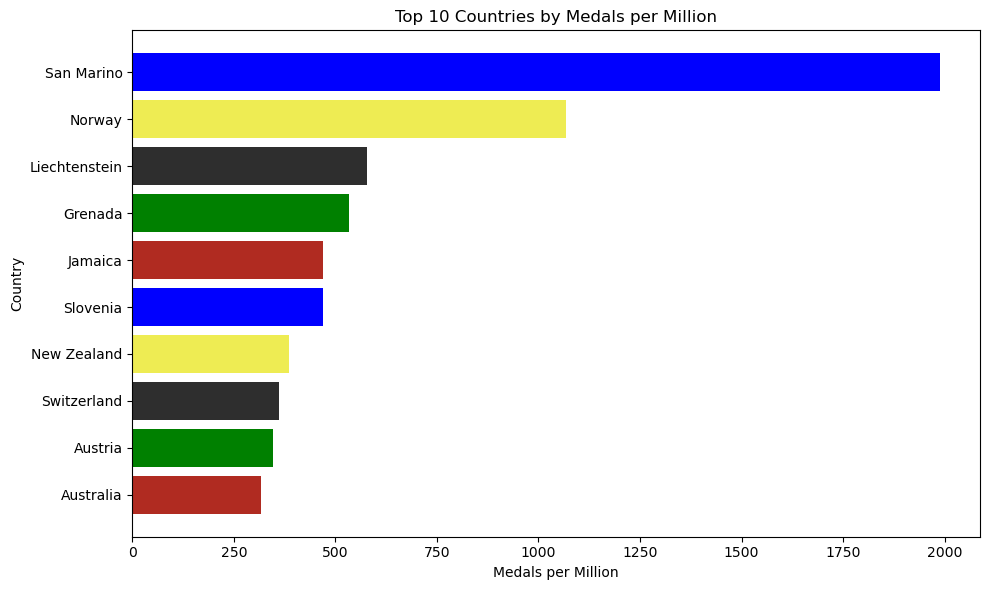

In [60]:
import matplotlib.pyplot as plt

# Define custom Olympic colors
olympic_colors = ['blue', '#EEEC53', '#2E2E2E', 'green', '#B02B21']

# Sort by medals per million
sorted_medals = recent_medal_sum_df_reset.sort_values(by='medals_per_millions', ascending=False)

# Plot the top 10 countries
top_10_countries = sorted_medals[['country', 'medals_per_millions']].head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))

# Apply custom Olympic colors cyclically
colors = [olympic_colors[i % len(olympic_colors)] for i in range(len(top_10_countries))]

# Horizontal bar plot with colors
plt.barh(top_10_countries['country'], top_10_countries['medals_per_millions'], color=colors)

# Add labels and title
plt.xlabel('Medals per Million')
plt.ylabel('Country')
plt.title('Top 10 Countries by Medals per Million')

# Invert y-axis for highest values on top
plt.gca().invert_yaxis()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

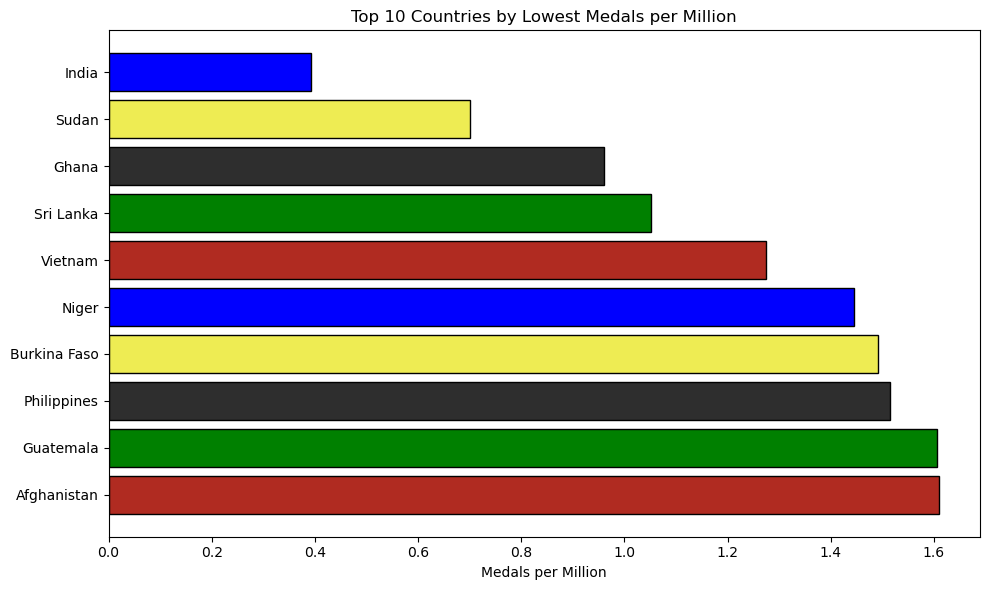

In [61]:
import matplotlib.pyplot as plt

# Step 1: Sort the data by 'medals_per_million' in ascending order and select the bottom 10
lowest_10_countries = recent_medal_sum_df_reset.sort_values(by='medals_per_millions').head(10)

# Step 2: Define colors for individual rows (you can define your custom list of colors here)
colors = ['blue', '#EEEC53', '#2E2E2E', 'green', '#B02B21', 'blue', '#EEEC53', '#2E2E2E', 'green', '#B02B21']

# Step 3: Create the horizontal bar chart with individual colors
plt.figure(figsize=(10, 6))
plt.barh(lowest_10_countries['country'], lowest_10_countries['medals_per_millions'], color=colors,edgecolor="black")

# Step 4: Customize the chart
plt.xlabel('Medals per Million')
plt.title('Top 10 Countries by Lowest Medals per Million')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the lowest medals at the top
plt.tight_layout()
plt.show()

In [62]:
# Define a function to create Linear Regression plots
def regress_plot(x_vals, y_vals, x_label, y_label, annotation,country):
    #do the regression
    (slope, intercept, rval, pval, stderr) = sc.linregress(x_vals,y_vals)
    regress_vals = x_vals*slope +intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rval)
    print(equation)


    #Make a plot
    # Set Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_vals, y_vals, edgecolor = "black", c='teal', s=100)
    plt.plot(x_vals, regress_vals, color = "black", alpha = .75)
    
    # Customizations
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs. {y_label} for {country}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="-", color="lightgrey", alpha=0.75)

    # Annotate
    plt.annotate(equation, annotation, fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [63]:
import scipy.stats as sc

In [64]:
#recent_medal_sum_df_reset = recent_medal_sum_df_reset[recent_medal_sum_df_reset["country"]!="India"]

0.20974039564151645
y = 0.0x + 930.25


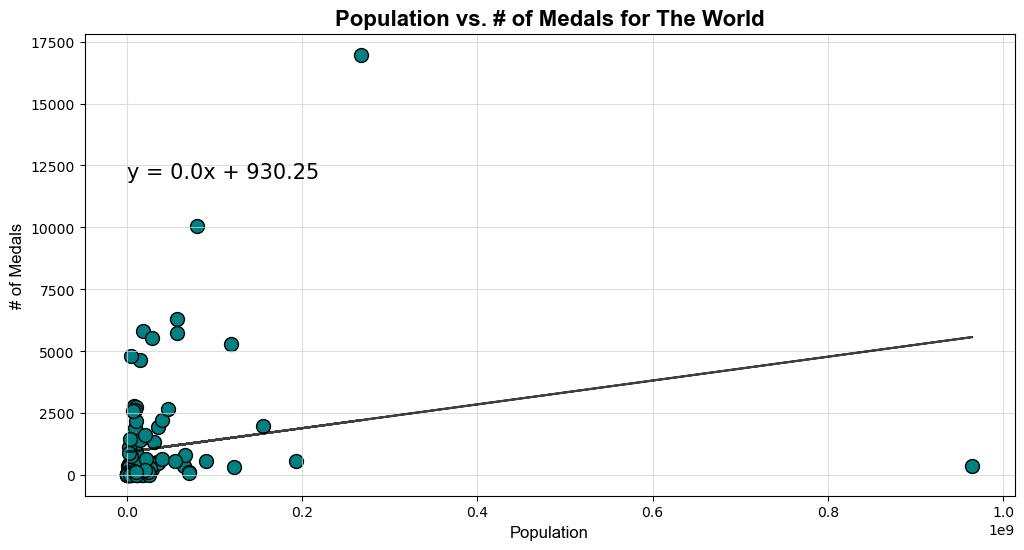

In [65]:
#just graphing countries of interest.
#recent_medal_sum_df_reset.drop(recent_medal_sum_df_reset["country"]== "India",inplace=True)
x_vals = recent_medal_sum_df_reset['Population']['mean']
y_vals = recent_medal_sum_df_reset["total"]['sum']
x_label = "Population"
y_label = "# of Medals"
annotation = (0,12000)



regress_plot(x_vals, y_vals, x_label, y_label, annotation, 'The World')

In [52]:
recent_medal_sum_df_reset = recent_medal_sum_df_reset.reset_index()

In [53]:
# Medals per million
#1e6*(recent_medal_sum_df['total'] / recent_medal_sum_df['Population']).sort_values(ascending=False)